In [1]:
# Load in our packages

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Connect to our data

myConjointData = pd.read_csv("C:/Users/merve/Desktop/Ex_Files_Data_Science_of_Marketing/Exercise_Files/06_03/conjoint-py.csv")

In [3]:
# See a snapshot of our data
myConjointData

,Rank,P1,P2,U1,U2,D1,D2,D3
0,7,1,0,1,0,1,0,0
1,6,1,0,0,1,1,0,0
2,8,0,1,1,0,1,0,0
3,1,0,1,0,1,1,0,0
4,10,1,0,1,0,0,1,0
5,3,1,0,0,1,0,1,0
6,4,0,1,1,0,0,1,0
7,2,0,1,0,1,0,1,0
8,9,1,0,1,0,0,0,1
9,12,1,0,0,1,0,0,1


In [5]:
# Update the names of our vectors

names = {"Rank":"Rank", "P1": "PhotoF1","P2": "PhotoF2", "U1": "Ux1", \
         "U2": "Ux2", "D1":"SpecialSauce1", \
         "D2":"SpecialSauce2", "D3":"SpecialSauce3"\
        }

# Apply those new names
myConjointData.rename(columns = names, inplace=True)

# Confirm all is as we intended 
myConjointData.head(1)

,Rank,PhotoF1,PhotoF2,Ux1,Ux2,SpecialSauce1,SpecialSauce2,SpecialSauce3
0,7,1,0,1,0,1,0,0


In [6]:
# Assign our test data to the x
X = myConjointData[['PhotoF1', 'PhotoF2', 'Ux1', 'Ux2', 'SpecialSauce1', \
                    'SpecialSauce2', 'SpecialSauce3']]
                 
# Assign a constant
X = sm.add_constant(X)

# Assign our resulting test data to the y
Y = myConjointData.Rank

# Perform a linear regression model 
myLinearRegressionForConjoint = sm.OLS(Y, X). fit()
myLinearRegressionForConjoint.summary()

c:\Users\merve\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4.232
Date:                Sat, 20 Jul 2024   Prob (F-statistic):             0.0471
Time:                        01:17:02   Log-Likelihood:                -24.520
No. Observations:                  12   AIC:                             59.04
Df Residuals:                       7   BIC:                             61.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7857      0.302      9.211      0.000       2.071       3.501
PhotoF1           2.7262      0.722      3.777      0.007       1.020       4.433
PhotoF2           0.0595      0.722      0.082      0.937      -1.647       1.766
Ux1               3.0595      0.722      4.239      0.004       1.353       4.766
Ux2              -0.2738      0.722     -0.379      0.716      -1.980       1.433
SpecialSauce1    -0.0714      1.003     -0.071      0.945      -2.443       2.301
SpecialSauce2    -0.8214      1.003     -0.819      0.440      -3.193       1.551
SpecialSauce3     3.6786      1.003      3.667      0.008       1.307       6.051
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.685
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.660
Skew:                           0.092   Prob(JB):                        0.719
Kurtosis:                       1.866   Cond. No.                     5.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.34e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
# Normalize values for each feature 
raw = [3.67,3.05,2.72]
norm = [float(i)/sum(raw) for i in raw]
norm

[0.388771186440678, 0.323093220338983, 0.288135593220339]

(np.float64(-1.0999992888197794),
 np.float64(1.0999992206683413),
 np.float64(-1.2049357125828595),
 np.float64(1.104990495748384))

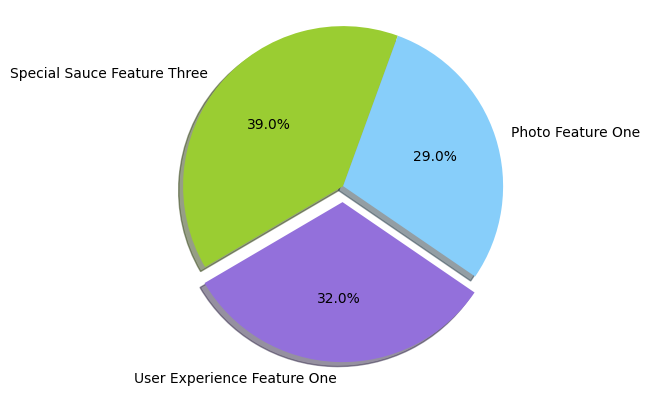

In [8]:
# Graph our winning product features

labels = 'Special Sauce Feature Three', 'User Experience Feature One', 'Photo Feature One'
sizes = [39, 32, 29]
colors = ['yellowgreen', 'mediumpurple', 'lightskyblue'] 
explode = (0, 0.1, 0)    
plt.pie(sizes,              
        explode=explode,   
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=70       
        )

plt.axis('equal')
